## 1. Introduction

In the competitive landscape of e-commerce, retaining customers is crucial for sustained business growth. The "Customer Churn Prediction" project aims to develop a Machine Learning model that predicts customer churn and provides actionable insights to reduce churn rates. By analyzing a comprehensive set of customer attributes and behaviors, this project strives to help the e-commerce platform proactively identify customers at risk of churning and make personalized recommendations to enhance their experience.

## 2. Methodology

The project follows a specific workflow for Customer Churn Prediction, involving data collection, exploratory data analysis (EDA), data splitting, data preprocessing, and modeling with evaluation and interpretation. The dataset is analyzed to understand relationships and patterns, features are selected, and the data is split into training, and testing sets. Preprocessing steps are applied, and five models, logistic regression, Support Vector Machine, Random Forest, Xtreme Gradient Boosting, and Deep Neural Network are trained, evaluated, and interpreted using the dataset.

## 3. Development of Customer Churn Prediction ML Model

### 3.1 Import Libraries

In [1]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Data Preprocessing and Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import IsolationForest
from imblearn.over_sampling import SMOTE

# Model Evaluation and Metrics
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import roc_curve, roc_auc_score

# Model Training and Tuning
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Model Persistence and Loading
from tensorflow.keras.models import load_model
from joblib import dump, load

# Model Interpretation
import shap

### 3.2 Data Collection

The dataset includes information about customers, like whether they've left (churned), how long they've been customers, their preferences, behaviors, and other details that help predict if they might leave in the future.

In [2]:
# Read the CSV file and store it as a DataFrame
df = pd.read_excel('data/E Commerce Dataset.xlsx', sheet_name = 'E Comm')

# Drop CustomerID as it's not required for prediction
df = df.drop(columns=['CustomerID'])

print(df.shape)
df.head()

(5630, 19)


,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


### 3.3 Exploratory Data Analysis (EDA)

EDA is conducted to gain insights into the dataset, identify patterns, and understand the relationships between attributes and customer churn. This analysis provides valuable information for feature selection and modeling.

In [3]:
# Step 1: Identify data types
continuous_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Step 2: Calculate ranges for continuous columns
continuous_ranges = {}
for col in continuous_columns:
    continuous_ranges[col] = (df[col].min(), df[col].max())

# Step 3: List unique categories for categorical columns
categorical_categories = {}
for col in categorical_columns:
    categorical_categories[col] = df[col].unique()

# Step 4: Print the results
print("Ranges of Continuous Values:")
for col, (min_val, max_val) in continuous_ranges.items():
    print(f"{col}: {min_val} - {max_val}")

print("\nCategories in Categorical Values:")
for col, categories in categorical_categories.items():
    print(f"{col}: {', '.join(categories)}")

Ranges of Continuous Values:
Churn: 0 - 1
Tenure: 0.0 - 61.0
CityTier: 1 - 3
WarehouseToHome: 5.0 - 127.0
HourSpendOnApp: 0.0 - 5.0
NumberOfDeviceRegistered: 1 - 6
SatisfactionScore: 1 - 5
NumberOfAddress: 1 - 22
Complain: 0 - 1
OrderAmountHikeFromlastYear: 11.0 - 26.0
CouponUsed: 0.0 - 16.0
OrderCount: 1.0 - 16.0
DaySinceLastOrder: 0.0 - 46.0
CashbackAmount: 0.0 - 324.99

Categories in Categorical Values:
PreferredLoginDevice: Mobile Phone, Phone, Computer
PreferredPaymentMode: Debit Card, UPI, CC, Cash on Delivery, E wallet, COD, Credit Card
Gender: Female, Male
PreferedOrderCat: Laptop & Accessory, Mobile, Mobile Phone, Others, Fashion, Grocery
MaritalStatus: Single, Divorced, Married


Dataset has 0 variance; skipping density estimate.


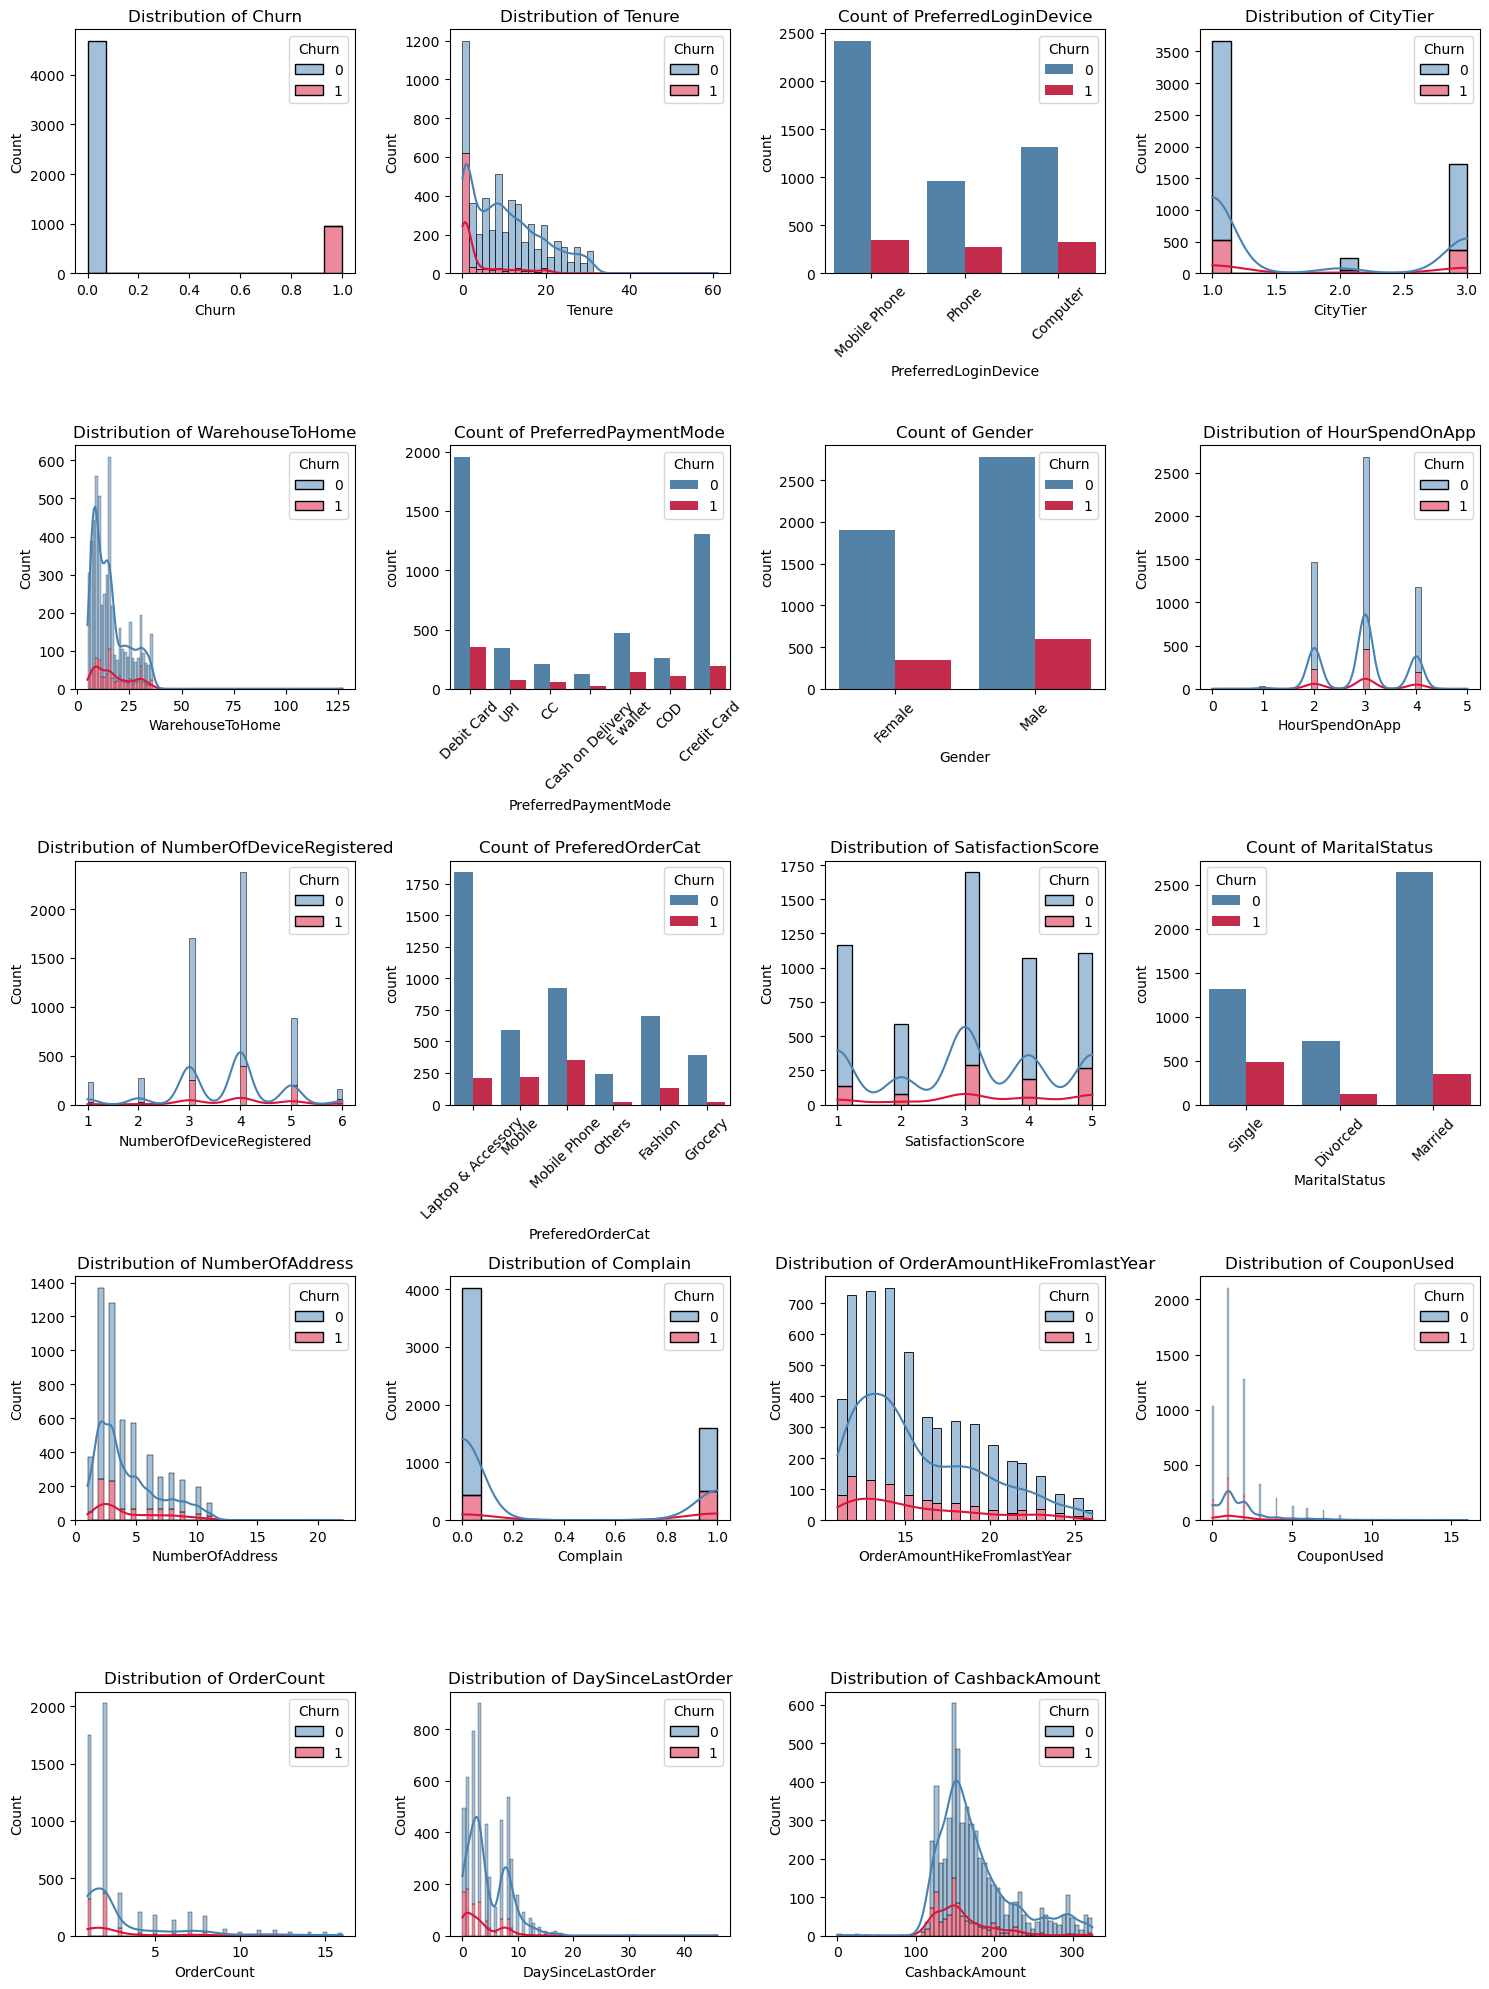

In [4]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(5, 4, figsize=(15, 20))

# Set the desired color palette
color_palette = ['steelblue', 'crimson']

# Iterate over the columns of the DataFrame
for i, column in enumerate(df.columns):
    # Determine the position of the subplot in the grid
    row = i // 4
    col = i % 4

    # Check if the current column is numerical
    if df[column].dtype == 'float64' or df[column].dtype == 'int64':
        # Plot a histogram for numerical features
        sns.histplot(data=df, x=column, kde=True, hue='Churn', multiple='stack', palette=color_palette, ax=axes[row, col])
        axes[row, col].set_title(f'Distribution of {column}')
        axes[row, col].tick_params(axis='x')  # Rotate x-axis labels if needed
    else:
        # Plot a barplot for categorical features
        sns.countplot(data=df, x=column, hue='Churn', palette=color_palette, ax=axes[row, col])
        axes[row, col].set_title(f'Count of {column}')
        axes[row, col].tick_params(axis='x', rotation=45)  # Rotate x-axis labels if needed

# If there are less than 20 columns, remove the empty subplots
if len(df.columns) < 20:
    for i in range(len(df.columns), 20):
        fig.delaxes(axes.flatten()[i])

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

### 3.4 Data Splitting

The dataset is split into training and testing sets. The training set is used for training the model and the testing set is used for evaluation.

In [5]:
# Separate the features (X) and the target variable (y)
X = df.drop("Churn", axis=1)
y = df["Churn"]

train_size = 0.80
test_size = 1-train_size

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

print("Train Set: ", train_size)
print("Train Records Count: ", X_train.shape[0])
print("Test Set: ", round(test_size,1))
print("Test Records Count: ", X_test.shape[0])

Train Set:  0.8
Train Records Count:  4504
Test Set:  0.2
Test Records Count:  1126


### 3.5 Data Preprocessing

Data preprocessing involves several steps, including data cleaning, feature scaling, feature encoding, outlier removal, and handling imbalanced datasets.

In [6]:
X_train_numerical = X_train.select_dtypes(include=['float64', 'int64'])
X_train_categorical = X_train.select_dtypes(include=['object'])
X_test_numerical = X_test.select_dtypes(include=['float64', 'int64'])
X_test_categorical = X_test.select_dtypes(include=['object'])

#### Data Cleaning

This code snippet first analyzes data and then uses the SimpleImputer method to fill missing values with the mean in numerical features, both in the training and test sets, ensuring complete datasets for analysis.

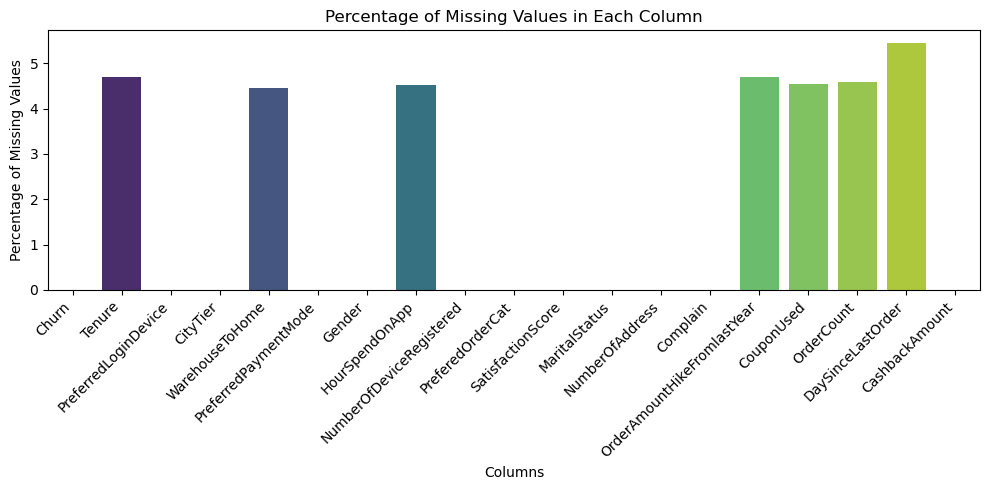

In [7]:
# Calculate the percentage of missing values in each column
missing_percent = (df.isnull().sum() / len(df)) * 100

# Create a bar plot to visualize missing values using seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x=missing_percent.index, y=missing_percent.values, palette='viridis')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Percentage of Missing Values in Each Column')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

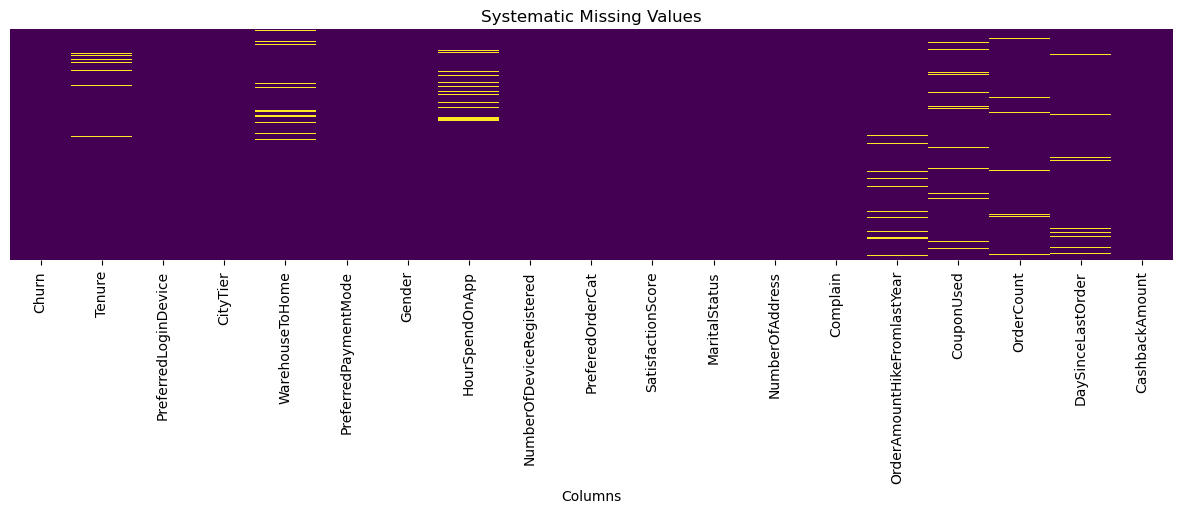

In [8]:
# Create a heatmap to visualize the pattern of missing values
plt.figure(figsize=(15, 3))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Systematic Missing Values')
plt.xlabel('Columns')
plt.show()

In [9]:
# Create an instance of SimpleImputer for numerical features
num_imputer = SimpleImputer(strategy='mean')

# Fit-transform on the training set
X_train_imputed = pd.DataFrame(num_imputer.fit_transform(X_train_numerical), columns=X_train_numerical.columns, index=X_train_numerical.index)

# Transform on the test set
X_test_imputed = pd.DataFrame(num_imputer.transform(X_test_numerical), columns=X_test_numerical.columns, index=X_test_numerical.index)

#### Feature Scaling - Standard Scaling

This code snippet standardizes the numerical features by transforming them to have a mean of 0 and a standard deviation of 1 using the StandardScaler, ensuring consistent scale across the training and test sets for machine learning.

In [10]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on X_train_imputed
scaler.fit(X_train_imputed)

# Transform X_train_imputed and X_test using the fitted scaler
X_train_scaled = scaler.transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Convert to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_numerical.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_train_numerical.columns)

#### Feature Encoding - One Hot Encoding

This code snippet utilizes the OneHotEncoder to convert categorical features into binary-encoded columns: fitting the encoder to the training set, transforming both training and test sets, and then converting the encoded arrays back into DataFrames for machine learning analysis.

In [11]:
# Create an instance of OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder on X_train_categorical
encoder.fit(X_train_categorical)

# Transform X_train_categorical and X_test_categorical using the fitted encoder
X_train_encoded = encoder.transform(X_train_categorical)
X_test_encoded = encoder.transform(X_test_categorical)

# Convert the encoded arrays back to DataFrames
X_train_encoded_df = pd.DataFrame(X_train_encoded.toarray(), columns=encoder.get_feature_names_out(X_train_categorical.columns))
X_test_encoded_df = pd.DataFrame(X_test_encoded.toarray(), columns=encoder.get_feature_names_out(X_test_categorical.columns))

#### Concatenate DataFrames

This code snippet merges the processed numerical and categorical feature DataFrames together, creating comprehensive datasets for further machine learning tasks.

In [12]:
# Combine the numerical and categorical DataFrames
X_train_processed = pd.concat([X_train_scaled_df, X_train_encoded_df], axis=1)
X_test_processed = pd.concat([X_test_scaled_df, X_test_encoded_df], axis=1)

#### Outlier Removal

This code snippet employs the IsolationForest algorithm to detect outliers in the processed training data, and subsequently removes these outliers from both the feature set and corresponding labels, enhancing the data's quality for modeling.

In [13]:
# Create an instance of IsolationForest
isolation_forest = IsolationForest(contamination=0.025, random_state=42)

# Fit the model on your data
isolation_forest.fit(X_train_processed)

# Predict outliers for the training data
outliers_train = isolation_forest.predict(X_train_processed)

# Remove outliers from the training set
X_train_processed_outliers_removed = X_train_processed[outliers_train == 1]
y_train_outliers_removed = y_train[outliers_train == 1]

X does not have valid feature names, but IsolationForest was fitted with feature names


#### Handling Imbalanced Dataset

This code snippet visualizes the distribution of two classes (0 and 1) in the target variable y_train before balancing, using a pie chart with custom colors and percentage labels. Subsequently, this code snippet employs the Synthetic Minority Over-sampling Technique (SMOTE) to balance the class distribution in the training data by generating synthetic samples for the minority class, resulting in a 1:2 ratio. The distribution of classes after balancing is visualized using a pie chart with custom colors and percentage lab

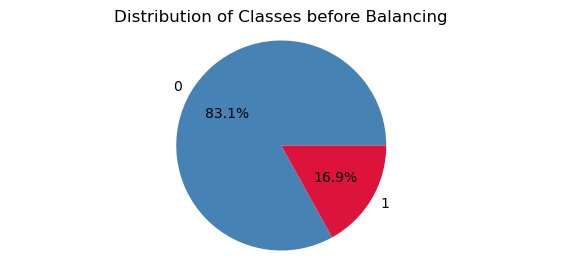

In [14]:
# Count the occurrences of 0 and 1
value_counts = y_train.value_counts()

# Define custom colors using Seaborn's color palette
colors = sns.color_palette(['steelblue', 'crimson'])

# Create a figure with a specific size
fig, ax = plt.subplots(figsize=(7, 3))

# Create a pie chart
plt.pie(value_counts, labels=value_counts.index, colors=colors, autopct='%1.1f%%')

# Set the aspect ratio to be equal to make the pie circular
plt.axis('equal')

# Add a title
plt.title('Distribution of Classes before Balancing')

# Display the plot
plt.show()

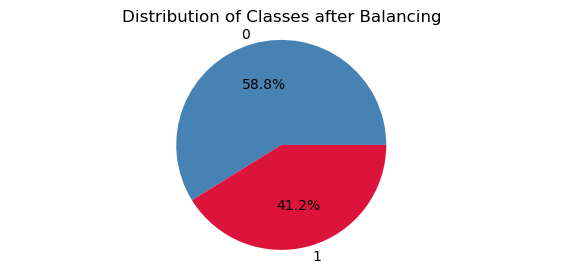

In [15]:
# Create an instance of SMOTE
smote = SMOTE(sampling_strategy=0.7)  # Generate synthetic samples for the minority class to achieve a 1:2 ratio

# Apply SMOTE to the training data
X_train_processed_resampled, y_train_resampled = smote.fit_resample(X_train_processed_outliers_removed, y_train_outliers_removed)

# Count the occurrences of each class in the resampled dataset
value_counts_resampled = y_train_resampled.value_counts()

# Define custom colors using Seaborn's color palette
colors = sns.color_palette(['steelblue', 'crimson'])

# Create a figure with a specific size
fig, ax = plt.subplots(figsize=(7, 3))

# Create a pie chart
plt.pie(value_counts_resampled, labels=value_counts_resampled.index, colors=colors, autopct='%1.1f%%')

# Set the aspect ratio to be equal to make the pie circular
plt.axis('equal')

# Add a title
plt.title('Distribution of Classes after Balancing')

# Display the plot
plt.show()

### 3.6 Modeling and Evaluation

Five models, logistic regression, Support Vector Machine, Random Forest, Xtreme Gradient Boosting, and Deep Neural Network are trained, evaluated, and interpreted using the dataset.

#### Machine Learning

The code defines a dictionary of classifiers with their corresponding hyperparameter search spaces, performs randomized hyperparameter search using cross-validation, and prints and records the best hyperparameters, training scores, and test scores for each classifier.

In [16]:
classifiers = {
    'LR': {
        'classifier': LogisticRegression(),
        'param_grid': {
            'C': [0.1, 0.5, 1, 2, 5, 10],
            'penalty': [None, 'l2']  # Use None for no penalty, and 'l2' for L2 penalty
        }
    },

    'SVM': {
        'classifier': SVC(),
        'param_grid': {
            'C': [0.1, 0.5, 1, 2, 5, 10],
            'kernel': ['linear', 'rbf', 'poly']
        }
    },

    'RF': {
        'classifier': RandomForestClassifier(),
        'param_grid': {
            'n_estimators': [50, 100, 200, 300],
            'max_depth': [3, 5, 8, 10, 15],
            'min_samples_split': [2, 5, 10, 15],
            'min_samples_leaf': [1, 2, 4, 6]
        }
    },

    'XGB': {
        'classifier': XGBClassifier(),
        'param_grid': {
            'n_estimators': [50, 100, 200, 300],
            'max_depth': [3, 5, 8, 10, 15],
            'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0]
        }
    },
}

# Initialize the stratified k-fold cross-validation
n_folds = 10
skf = StratifiedKFold(n_splits=n_folds, shuffle=True)

train_scores = {}
test_scores = {}

for clf_name, clf_info in classifiers.items():

    random_search = RandomizedSearchCV(
        estimator=clf_info['classifier'],
        param_distributions=clf_info['param_grid'],
        n_iter=10,
        scoring='roc_auc',
        n_jobs=-1,
        cv=skf,
        refit=True
    )
    random_search.fit(X_train_processed_resampled, y_train_resampled)

    print(clf_name)
    print("Best hyperparameters: ", random_search.best_params_)

    train_score = random_search.best_score_
    print("Train score: ", train_score)

    y_pred_test = random_search.predict(X_test_processed)
    test_score = roc_auc_score(y_test, y_pred_test)
    print("Test set score: ", test_score)
    print()

    train_scores[clf_name] = train_score
    test_scores[clf_name] = test_score

LR
Best hyperparameters:  {'penalty': 'l2', 'C': 10}
Train score:  0.8926217169815752
Test set score:  0.8298158945342792

SVM
Best hyperparameters:  {'kernel': 'rbf', 'C': 10}
Train score:  0.997411424368385
Test set score:  0.9352270442599879

RF
Best hyperparameters:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}
Train score:  0.9915097212681765
Test set score:  0.8638940747336071

XGB
Best hyperparameters:  {'n_estimators': 300, 'max_depth': 8, 'learning_rate': 0.05}
Train score:  0.9966112422236092
Test set score:  0.9389924462188012



#### Deep Learning

This code segment defines, compiles, and trains a neural network model using TensorFlow's Keras API. It then predicts probabilities for the train and test sets, calculates ROC AUC scores, and prints the scores for both the training and test sets.

In [17]:
print(X_train_processed_resampled.shape)
print(y_train_resampled.shape)
print(X_test_processed.shape)
print(y_test.shape)

(6208, 34)
(6208,)
(1126, 34)
(1126,)


In [18]:
# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_processed_resampled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with the appropriate loss function and optimizer
model.compile(loss='binary_crossentropy', optimizer='adam')

# Train the model on the training set
model.fit(X_train_processed_resampled, y_train_resampled, epochs=30, batch_size=12, verbose=1)

# Predict probabilities for train and test sets
y_train_pred = model.predict(X_train_processed_resampled)
y_test_pred = model.predict(X_test_processed)

# Calculate ROC AUC scores for train and test sets
DNN_train_score = roc_auc_score(y_train_resampled, y_train_pred)
DNN_test_score = roc_auc_score(y_test, y_test_pred)

# Print the scores
print("Train set score: ", DNN_train_score)
print("Test set score: ", DNN_test_score)

Epoch 1/30
518/518 [==============================] - 1s 1ms/step - loss: 0.4318
Epoch 2/30
518/518 [==============================] - 1s 1ms/step - loss: 0.2959
Epoch 3/30
518/518 [==============================] - 1s 1ms/step - loss: 0.2164
Epoch 4/30
518/518 [==============================] - 1s 1ms/step - loss: 0.1593
Epoch 5/30
518/518 [==============================] - 1s 1ms/step - loss: 0.1218
Epoch 6/30
518/518 [==============================] - 1s 1ms/step - loss: 0.0919
Epoch 7/30
518/518 [==============================] - 1s 1ms/step - loss: 0.0647
Epoch 8/30
518/518 [==============================] - 1s 1ms/step - loss: 0.0515
Epoch 9/30
518/518 [==============================] - 1s 1ms/step - loss: 0.0423
Epoch 10/30
518/518 [==============================] - 1s 1ms/step - loss: 0.0392
Epoch 11/30
518/518 [==============================] - 1s 1ms/step - loss: 0.0306
Epoch 12/30
518/518 [==============================] - 1s 1ms/step - loss: 0.0206
Epoch 13/30
518/518 [====

#### Model Performance Visualization

This code snippet appends Deep Neural Network (DNN) ROC AUC scores to the existing dictionaries, and then visualizes the performance of classifiers (LR, SVM, RF, XGB, DNN) using a horizontal bar plot that compares train and test scores with annotations.

FixedFormatter should only be used together with FixedLocator


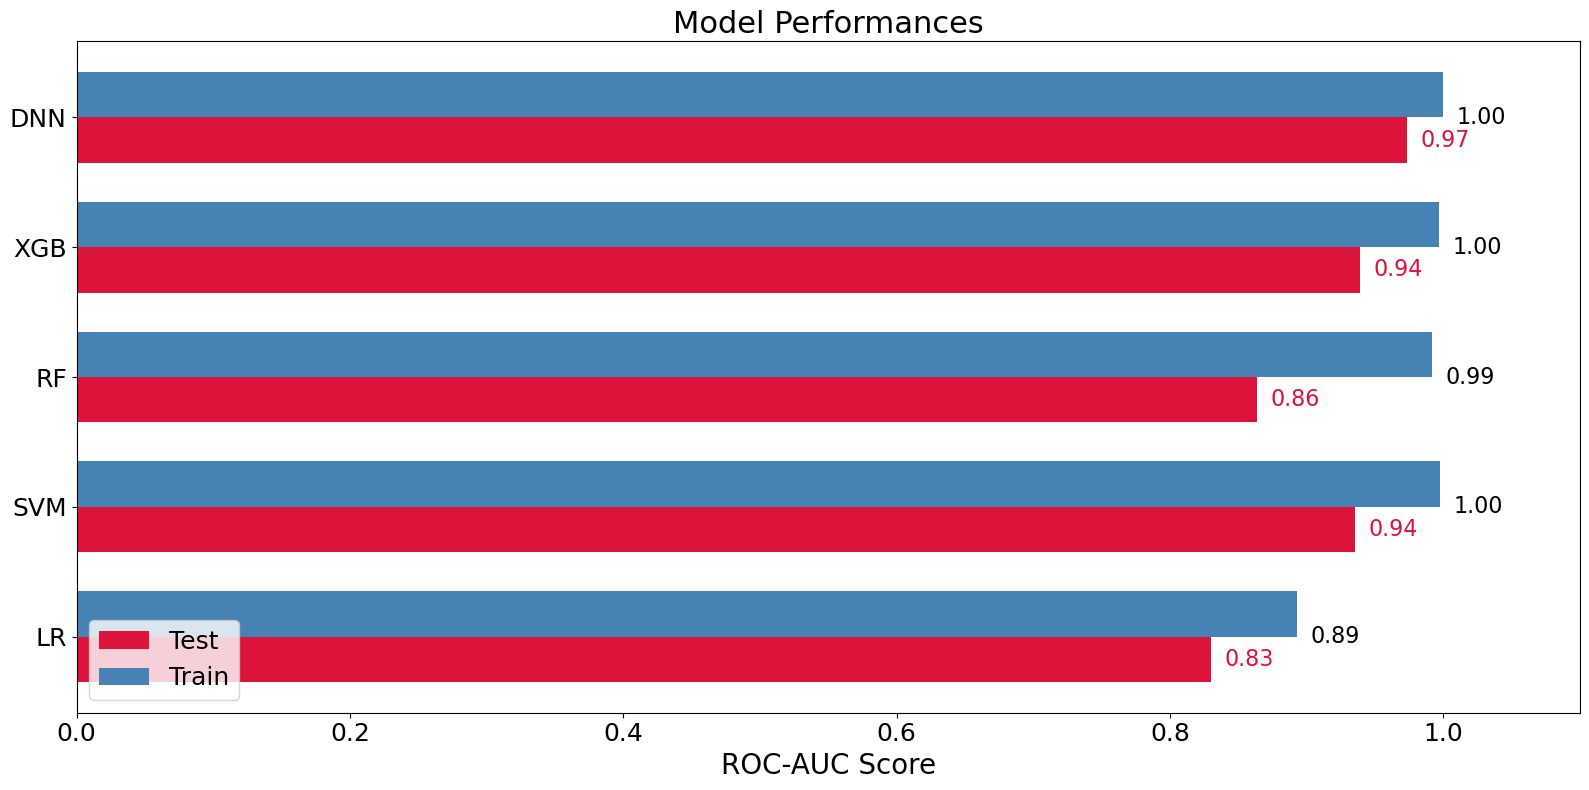

In [19]:
# Append DNN_train_score to train_scores dictionary
train_scores['DNN'] = DNN_train_score

# Append DNN_test_score to test_scores dictionary
test_scores['DNN'] = DNN_test_score

# Define the algorithm names
classifiers = ['LR', 'SVM', 'RF', 'XGB', 'DNN']

# Extract the scores for each classifier from dictionaries and store in lists
train_scores_list = [train_scores[classifier] for classifier in classifiers]
test_scores_list = [test_scores[classifier] for classifier in classifiers]

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(16, 8))
y_pos = np.arange(len(classifiers))
bar_width = 0.35

# Plot test scores
ax.barh(y_pos, test_scores_list, bar_width, align='center', color='crimson', label='Test')

# Plot train scores
ax.barh(y_pos + bar_width, train_scores_list, bar_width, align='center', color='steelblue', label='Train')

# Set y-axis ticks and labels with increased font size
ax.set_yticks(y_pos + bar_width/2)
ax.set_yticklabels(classifiers, fontsize=18)

# Set x-axis tick labels with increased font size
ax.set_xticklabels(ax.get_xticks(), fontsize=18)

# Set x-axis tick labels with increased font size and precision
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.1f}'))

# Set x-axis label and title with increased font size
ax.set_xlabel('ROC-AUC Score', fontsize=20)
ax.set_title('Model Performances', fontsize=22)

# Add annotations to the bars with increased font size
for i, train_score in enumerate(train_scores_list):
    ax.text(train_score + 0.01, i + bar_width/2, f'{train_score:.2f}', ha='left', va='center', fontsize=16)

for i, test_score in enumerate(test_scores_list):
    ax.text(test_score + 0.01, i, f'{test_score:.2f}', ha='left', va='center', color='crimson', fontsize=16)

# Adjust the plot limits
max_score = max(max(train_scores_list), max(test_scores_list))
ax.set_xlim([0, max_score + 0.1])

# Add legend with increased font size
ax.legend(loc='lower left', fontsize=18)

# Adjust layout to provide space for the legend
plt.tight_layout()

# Display the plot
plt.show()

### 3.7 Model Interpretation

This code segment converts processed data to NumPy arrays, randomly selects background samples, initializes a SHAP explainer with a deep learning model, computes SHAP values, and creates a summary bar plot for feature importance.

##### Feature Importances of DNN Model

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


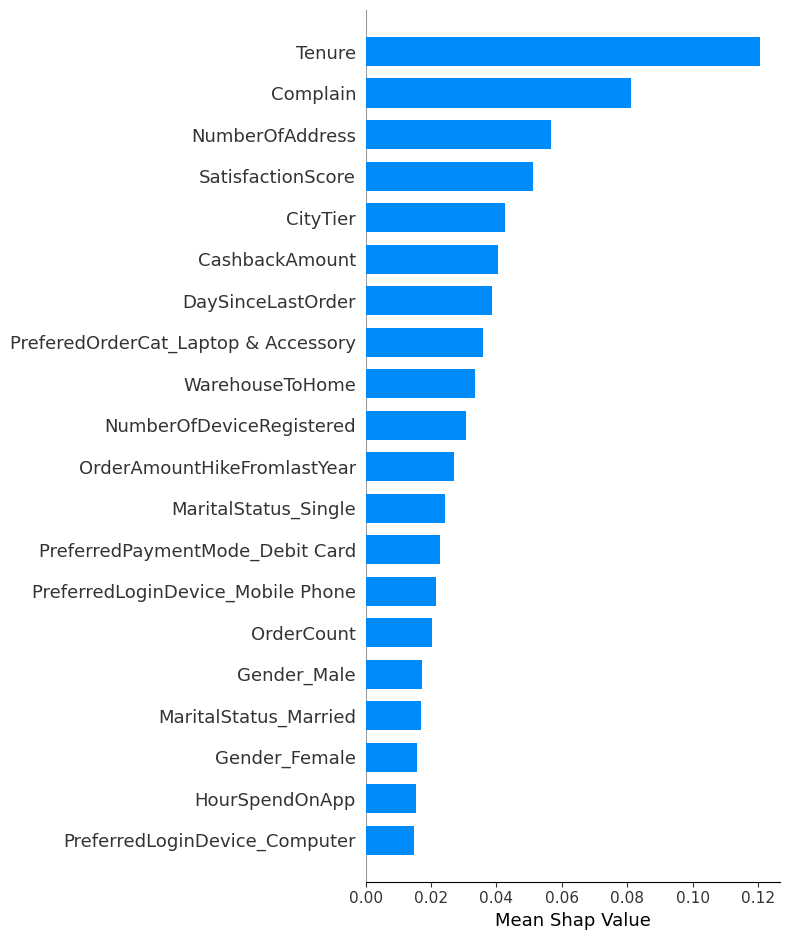

In [20]:
# Convert X_train_processed_resampled to a NumPy array
X_train_array = np.array(X_train_processed_resampled)

# Convert X_test_processed to a NumPy array
X_test_array = np.array(X_test_processed)

# Set a random state for reproducibility (choose any seed value you like)
random_state = 42
np.random.seed(random_state)

# Choose the number of background samples you want to use
num_background_samples = 1000

# Randomly select num_background_samples from X_train_array
random_indices = np.random.choice(X_train_array.shape[0], num_background_samples, replace=False)
background_samples = X_train_array[random_indices]

# Initialize the SHAP explainer with the model and the reduced background samples
explainer = shap.DeepExplainer(model, background_samples)

# Compute the SHAP values for the test set
shap_values = explainer.shap_values(X_test_array)

# Create a summary plot for the entire test set (without the legend)
shap.summary_plot(shap_values, X_test_array, plot_type="bar", feature_names=X_test_processed.columns, show=False)

# Get the current figure and axes
fig, ax = plt.gcf(), plt.gca()

# Remove the legend
ax.get_legend().remove()

# Set the x-axis label as "Mean Shap Value"
plt.xlabel("Mean Shap Value")

# Show the plot
plt.show()

## 4. Conclusion

The results indicate that all the algorithms perform and generalize reasonably well in churn prediction. However, the DNN model exhibited better overall performance in accurately predicting insurance premiums, as reflected by a higher ROC-AUC score of 0.97 on the Test set. This suggests that the DNN model is not only accurate but also effectively captures the underlying patterns and relationships in the data, making it a preferred choice for customer churn prediction. Lastly, the SHAP insights for the ANN model reveal that Tenure, Complain, and Number of Addresses are the top 3 predictors of customer churn.